# Current Population Survey Linear Regression

Using Linear Regression to predict each of the numerical variables in the datset.

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
# We only need numerical values for regression
data = pd.read_csv("../datasets/CPS2016_UPDATE.csv", 
                  usecols=['age', 'weekly_hrs', 'educ', 
                'fam_income', 'num_in_house', 'num_child']).astype(float)

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

T = LinearRegression()

# Apply 80/20 training/testing split
# Results may vary each time the data is split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child
0,28.0,40.0,11.0,11.0,6.0,4.0
1,44.0,50.0,13.0,16.0,5.0,2.0
2,23.0,20.0,9.0,14.0,3.0,0.0
3,20.0,20.0,7.0,9.0,5.0,0.0
4,20.0,20.0,9.0,13.0,4.0,0.0


In [3]:
# function to return necessary information about model
def scoreLinearRegressor(x, y, xTest, yTest):

    reg = LinearRegression()
    reg.fit(x,y)

    preds = reg.predict(xTest)
    print("R2 score : %.2f" % r2_score(yTest,preds))
    print("Mean squared error: %.2f" % mean_squared_error(yTest,preds))

    er = []
    g = 0
    for i in range(len(yTest)):
        x = (yTest[i] - preds[i]) **2
        er.append(x)
        g = g + x
    
    x = 0
    for i in range(len(er)):
       x = x + er[i]

    print ("MSE", x / len(er))

    v = np.var(er)
    print ("variance", v)

    print ("average of errors ", np.mean(er))

    m = np.mean(yTest)
    print ("average of observed values", m)

    y = 0
    for i in range(len(yTest)):
        y = y + ((yTest[i] - m) ** 2)

    print ("total sum of squares", y)
    print ("ẗotal sum of residuals ", g)
    print ("r2 calculated", 1 - (g / y)) 
    
# function to plot predictions vs training data    
def plotPredictions(data_train, data_test, prediction, target):
    fig, ax = plt.subplots(1,5, figsize=(15,3), dpi=100)
    loopData = data_train.drop(target, axis=1)
    for i, var in enumerate(loopData):
        ax[i].scatter(data_train[var], data_train[target], color='pink', marker='x', label='train')
        ax[i].scatter(data_test[var], data_test[target], color='red', marker='*', label='test', alpha=.2)
        ax[i].scatter(data_test[var], prediction, color='purple', marker='.', label='predicted', alpha=.9)
        ax[i].set_xlabel(var)
        ax[i].set_ylabel(target)
    
    # Remove duplicate labels    
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))    
    fig.legend(by_label.values(), by_label.keys())
    plt.show()     

# Predict Number of Persons Living in Household

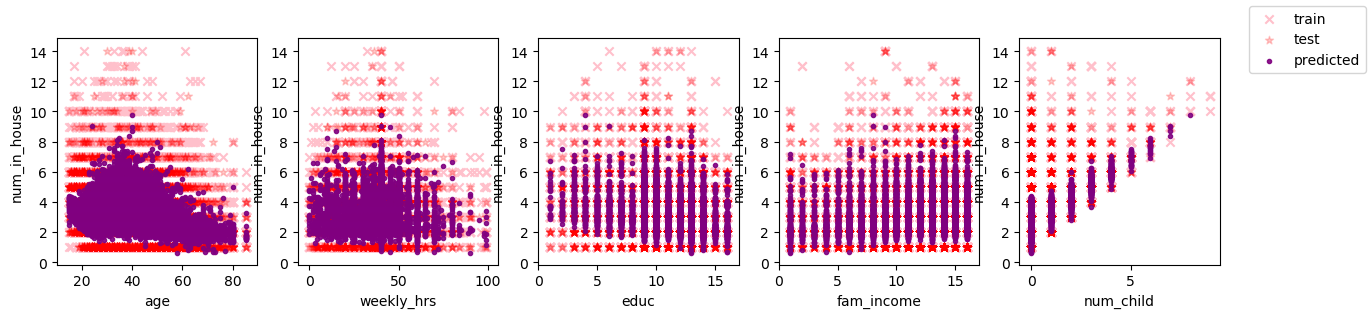

In [4]:
target = 'num_in_house'
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));

plotPredictions(data_train, data_test, prediction, target)    

In [5]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]
                 
scoreLinearRegressor(x, y, xTest, yTest)                 

R2 score : 0.42
Mean squared error: 1.42
MSE 1.4186616972315038
variance 18.851948451233
average of errors  1.4186616972314983
average of observed values 3.0695864627635507
total sum of squares 27025.488010136374
ẗotal sum of residuals  15677.630416105349
r2 calculated 0.4198946413021225


In [6]:
# Score with cross validation
cvscore = cross_val_score(T, data.drop(target, axis=1), 
                          data[target], cv=KFold(shuffle=True, n_splits=5))
cvscore.mean()

0.406288793237734

Linear Regression and Decision Tree Regression for predicting num_in_house produced very similar R2 scores when predicting 'number of persons living in household', while AdaBoost is producing lower scores around .222. The MSE and Variance are very close to Decision Tree Regression results.

# Predict Number of own Children under 18 years of age

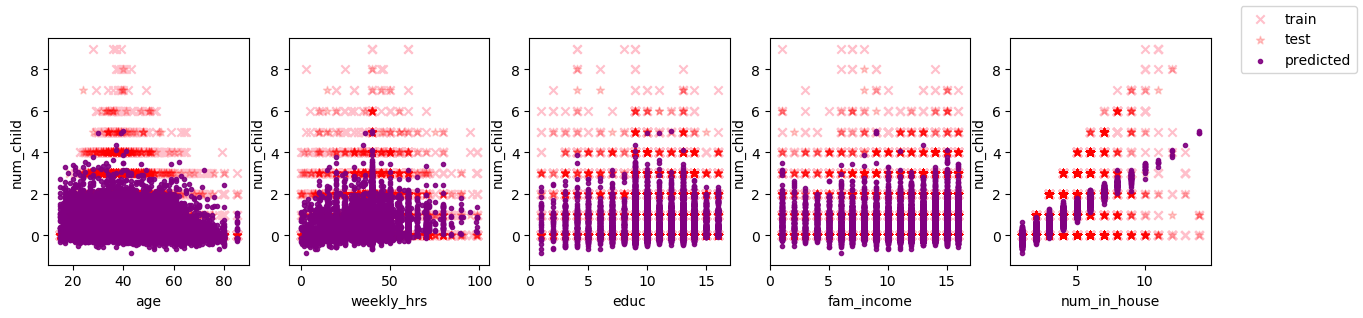

In [7]:
target = 'num_child'
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)     

In [8]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]
                 
scoreLinearRegressor(x, y, xTest, yTest)   

R2 score : 0.36
Mean squared error: 0.68
MSE 0.6764522732395138
variance 1.8101151474343053
average of errors  0.6764522732395154
average of observed values 0.6074563387928694
total sum of squares 11739.145597680921
ẗotal sum of residuals  7475.474071569868
r2 calculated 0.3632011793902058


In [9]:
# Score with cross validation
cvscore = cross_val_score(T, data.drop(target, axis=1), 
                          data[target], cv=KFold(shuffle=True, n_splits=5))
cvscore.mean()

0.3477495517856261

Linear Regression for predicting num_child produced lower R2 scores than decision tree regression and adaboost regression. It also has the largest variance and MSE.

# Predict Family Income (Numerical Value)
Family income is represented by integers 1 - 16, each representing increaseng income groups ranging from 'less than 5,000' to 'greater than 150,000'. Refer to dataset description for more information.

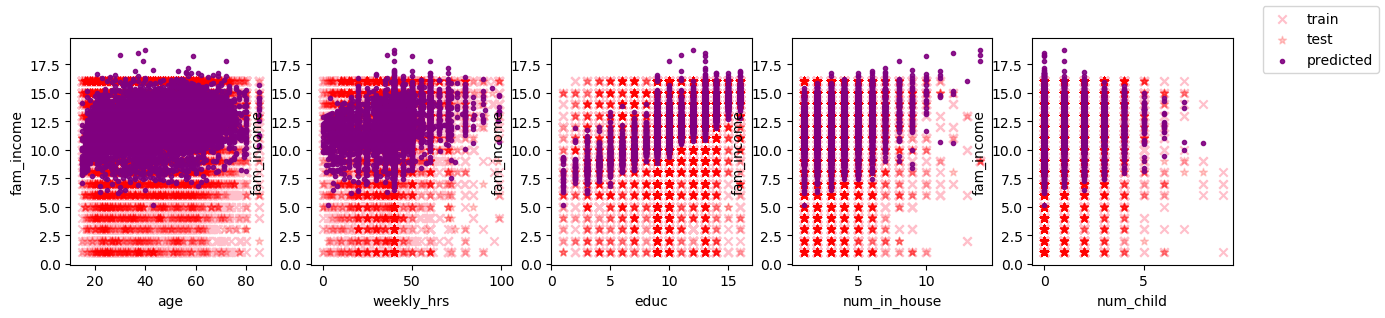

In [10]:
target = 'fam_income'
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)    

In [11]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]
                 
scoreLinearRegressor(x, y, xTest, yTest)   

R2 score : 0.18
Mean squared error: 10.05
MSE 10.05150358183876
variance 350.1012472377649
average of errors  10.051503581838745
average of observed values 12.161704823092933
total sum of squares 135436.03348113367
ẗotal sum of residuals  111079.16608290015
r2 calculated 0.17984037757297766


In [12]:
# Score with cross validation
cvscore = cross_val_score(T, data.drop(target, axis=1), 
                          data[target], cv=KFold(shuffle=True, n_splits=5))
cvscore.mean()

0.17919886221239195

The R2 score is very low when predicting family income. The R2 score produced using Decision Tree Regression has a slightly larger R2 score than the other methods. The variance, and MSE are similar for each of the regression methods used.

# Predict Age

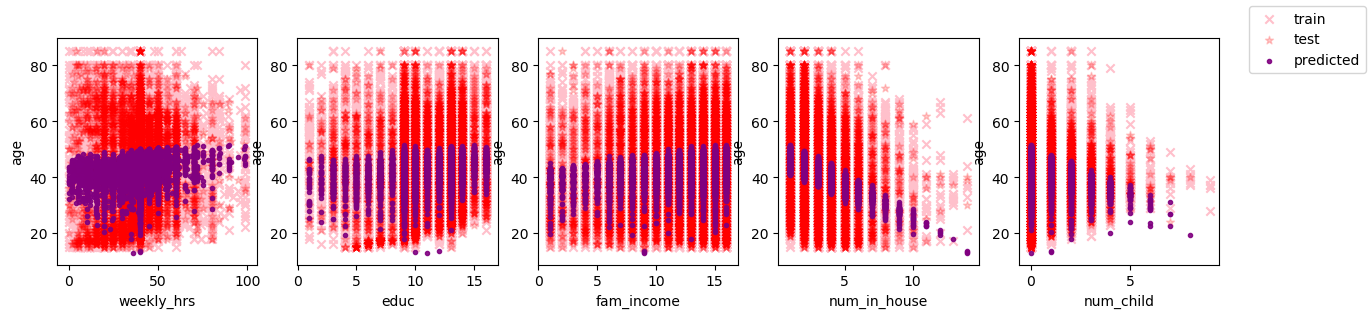

In [13]:
target = 'age'
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [14]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]
                 
scoreLinearRegressor(x, y, xTest, yTest)   

R2 score : 0.07
Mean squared error: 194.71
MSE 194.71328974114834
variance 47570.06586115137
average of errors  194.71328974114888
average of observed values 42.61433354447561
total sum of squares 2322526.2895665537
ẗotal sum of residuals  2151776.5649294304
r2 calculated 0.07351896312398243


In [15]:
# Score with cross validation
cvscore = cross_val_score(T, data.drop(target, axis=1), 
                          data[target], cv=KFold(shuffle=True, n_splits=5))
cvscore.mean()

0.07927892695536229

The R2 score is low for each method when predicting age, but linear regression produces a significantly lower score

# Predict Hours Worked Weekly

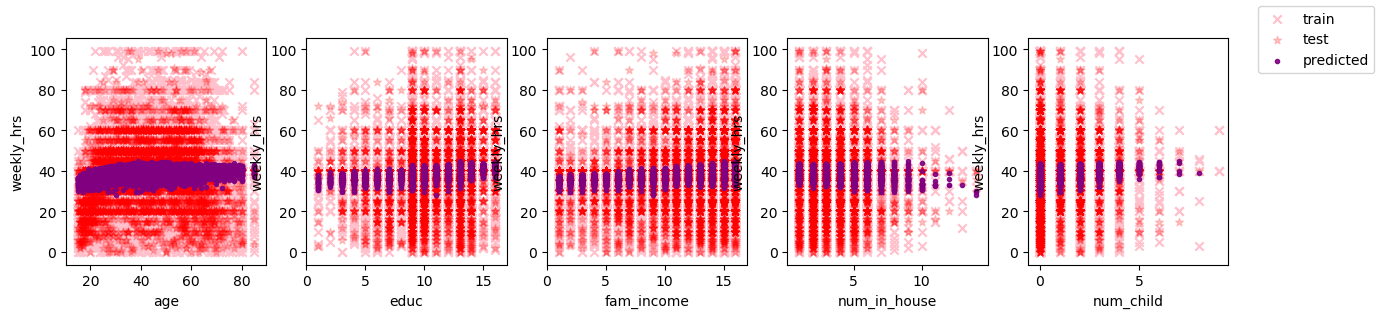

In [16]:
target = 'weekly_hrs'
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [17]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]
                 
scoreLinearRegressor(x, y, xTest, yTest)  

R2 score : 0.04
Mean squared error: 112.93
MSE 112.93004909977496
variance 73967.86129039677
average of errors  112.93004909977533
average of observed values 39.15455614876482
total sum of squares 1303718.018098047
ẗotal sum of residuals  1247989.972601613
r2 calculated 0.04274547465235912


In [18]:
# Score with cross validation
cvscore = cross_val_score(T, data.drop(target, axis=1), 
                          data[target], cv=KFold(shuffle=True, n_splits=5))
cvscore.mean()

0.041419035809356394

The R2 score is low for each method when predicting weekly_hrs, however linear regression produces the lowest score.

# Predict Education Level
Education level is represented by integers 31-46, each representing increaseng levels of education from 'less than first grade' to 'doctorates degree'. Refer to dataset description for more information.

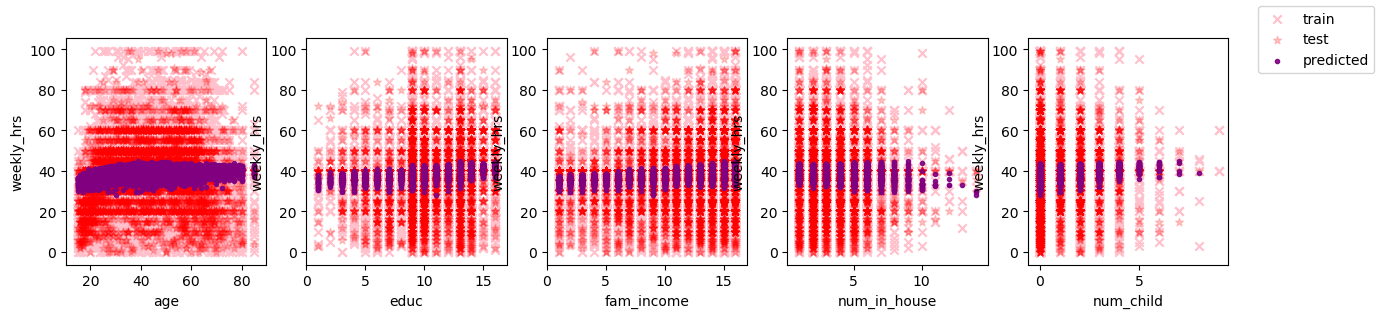

In [19]:
target = 'weekly_hrs'
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [20]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]
                 
scoreLinearRegressor(x, y, xTest, yTest)  

R2 score : 0.04
Mean squared error: 112.93
MSE 112.93004909977496
variance 73967.86129039677
average of errors  112.93004909977533
average of observed values 39.15455614876482
total sum of squares 1303718.018098047
ẗotal sum of residuals  1247989.972601613
r2 calculated 0.04274547465235912


In [21]:
# Score with cross validation
cvscore = cross_val_score(T, data.drop(target, axis=1), 
                          data[target], cv=KFold(shuffle=True, n_splits=5))
cvscore.mean()

0.04155302485026848

The R2 score is somewhat low for each method when predicting education, however linear regression produces the lowest score, and Decision Tree Regression produces a significantly higher score.